In this project, I will be using Python with SQLite to explore the CIA Factbook of data regarding all countries on Earth and uncover some basic relationships.

In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()

In [3]:
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
first5 = "SELECT * FROM facts limit 5"
pd.read_sql_query(first5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [5]:
min_max = "select min(population), max(population), min(population_growth), max(population_growth) from facts"
pd.read_sql_query(min_max, conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


We are going to further explore these two abnormalities: the data shows a country with a population of "0" and another with a population of 7.2 billion, roughly the population of Earth. We will use SQL queries to uncover the names of these locations.

In [6]:
no_pop = "select name from facts where population = 0"
pd.read_sql_query(no_pop, conn)

,name
0,Antarctica


In [7]:
huge_pop = "select name from facts where population = 7256490011"
pd.read_sql_query(huge_pop, conn)

,name
0,World


These two results make perfect sense. No one lives permanently on Antarctica and the 7.2 billion does indeed represent the world.

Next we will be creating histograms of the rest of the data, minus these two rows.

In [8]:
hist_data = "SELECT * FROM facts WHERE NOT population = 0 OR 7256490011"
newfacts = pd.read_sql_query(hist_data, conn)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd40195ebe0>,
      dtype=object)

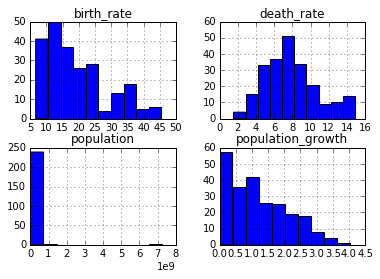

In [9]:
%matplotlib inline
newfacts.hist(column = ['population', 'population_growth', 'birth_rate', 'death_rate'])

Now that I have used SQL to select only the data that I want and stored it in a dataframe called newfacts, I can use Python to explore this data further.

I am curious to explore death_rate further and see if any columns correlate.

In [12]:
correlations = newfacts.corr()
correlations = correlations['death_rate']
print(correlations)

id                  -0.168815
area                 0.095558
area_land            0.093548
area_water           0.082843
population           0.003236
population_growth   -0.101521
birth_rate           0.125131
death_rate           1.000000
migration_rate      -0.257924
Name: death_rate, dtype: float64


Interestingly, the only column with a somewhat significant correlation coefficient is migration rate. It has a negative correlation coefficient of -0.25 with death rate. 

To me, this implies that the more a population grows through migration, the death rate (deaths / population) gets diluted, so to speak, and decreases. It may also mean that those migrating are generally not the elderly, as they do not add to the death rate, they decrease it.

Next I will create a scatter plot comparing death rate to migration rate.

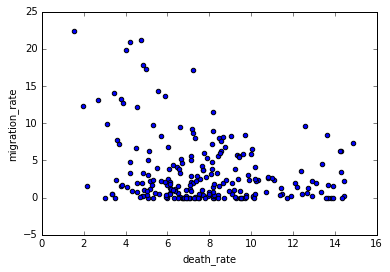

In [14]:
newfacts.plot.scatter(x='death_rate', y='migration_rate')

As we can see, the corellation is somewhat weak, but there is a general downward slope to the scatter plot. There is one country at the very top left, with the highest migration rate and the lowest death rate. Let's find out who this country is for our final task.

In [15]:
sorted_data = newfacts.sort_values(by=['migration_rate'], ascending=False)
sorted_data.head(5)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
140,141,qa,Qatar,11586.0,11586.0,0.0,2194817.0,3.07,9.84,1.53,22.39
241,242,aq,American Samoa,199.0,199.0,0.0,54343.0,0.30,22.89,4.75,21.13
114,115,fm,"Micronesia, Federated States of",702.0,702.0,0.0,105216.0,0.46,20.54,4.23,20.93
169,170,sy,Syria,185180.0,183630.0,1550.0,17064854.0,0.16,22.17,4.00,19.79
175,176,tn,Tonga,747.0,717.0,30.0,106501.0,0.03,23.00,4.85,17.84


It is interesting to note that Qatar has the highest migration rate and the lowest death rate, eventhough they have a fairly low birth rate. Since death rate is calculated as deaths / population, one would think that the country with the lowest death rate would also have a high birth date, because births increase the denominator: population.

I am sure that there are many factors that go into Qatar having the lowest death rate, but a high migration rate does appear to play a major role based on our analysis.